<a href="https://colab.research.google.com/github/machinelearning147/MachineLearning-YouTube/blob/master/web_scraping_from_dynamic_webpages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping from Dynamic Web Pages

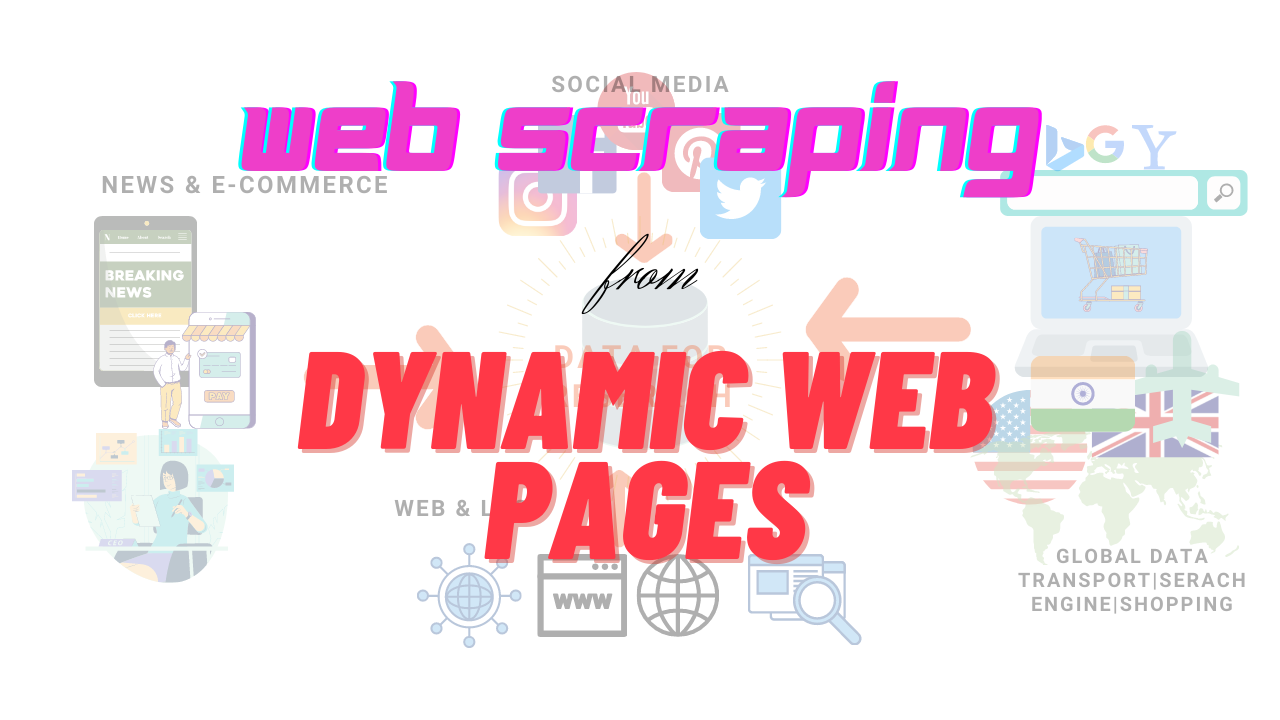




## Install dependencies

In [4]:
!pip install selenium -q
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 3.9MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease

## Import Packages

In [5]:
import os, subprocess
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException

import bs4
from bs4 import BeautifulSoup

import requests
import openpyxl
import time, re, csv, urllib.parse
from IPython.display import HTML



## set up driver

In [6]:
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')

# set the driver to perform the action
driver = webdriver.Chrome('chromedriver', options=options)

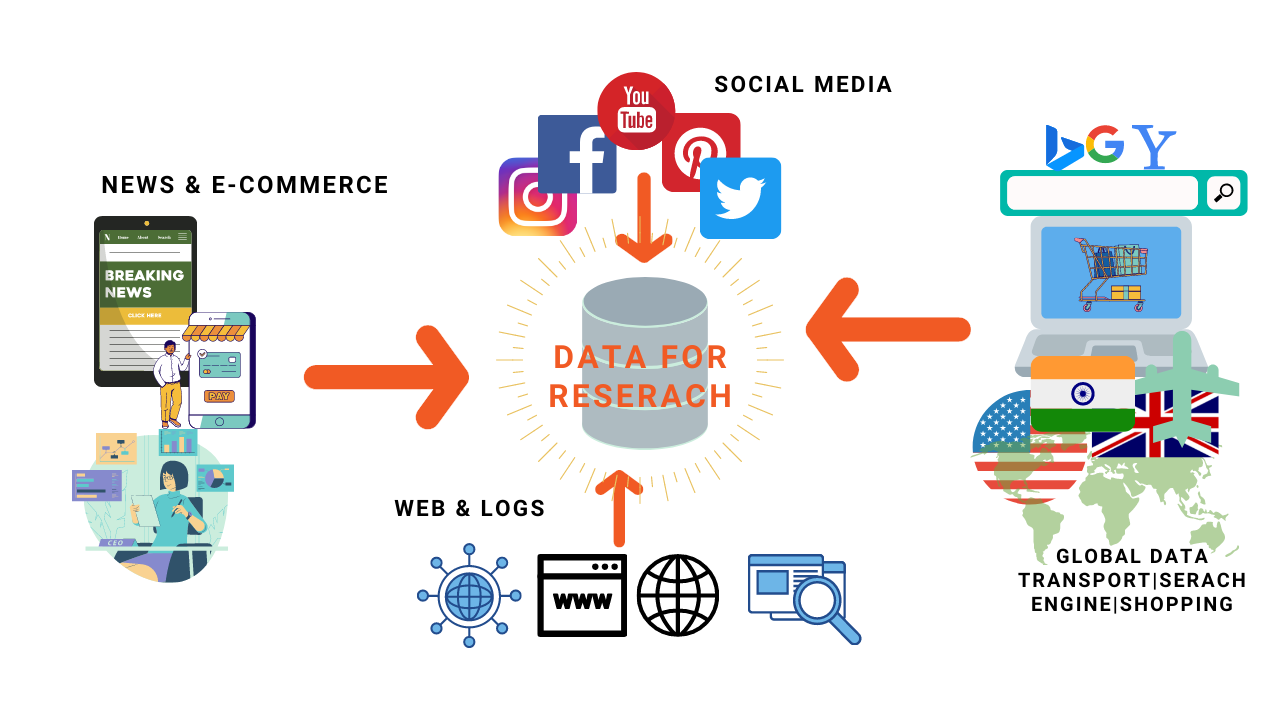

## Get the data from URL/ Web Source

In [17]:
#url of the page we want to scrape
url = "https://aws.amazon.com/ec2/spot/instance-advisor/# Display all 358 instance types" 
driver.get(url) 
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#aws-element-5a344a86-8a78-41ba-a08d-470b5257b98c > div.lb-row.lb-snap.lb-row-max-large.aws-spot-advisor-table > div:nth-child(2) > a"))).click()  
# this is just to ensure that the page is loaded
time.sleep(5) 
html = driver.page_source
  
# this renders the JS code and stores all
# of the information in static HTML code.


## Parse html using soup

In [18]:
  
# Now, we could simply apply bs4 to html variable
soup = BeautifulSoup(html, "html.parser")

In [19]:
print(soup.prettify())

<html class="no-js aws-v1-page aws-lng-en_US aws-with-target aws-ember" data-aws-assets="https://a0.awsstatic.com" data-css-version="1.0.513" data-js-version="1.0.568" lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link crossorigin="anonymous" href="https://a0.awsstatic.com" rel="preconnect"/>
  <link href="https://a0.awsstatic.com" rel="dns-prefetch"/>
  <link href="https://d1.awsstatic.com" rel="dns-prefetch"/>
  <link href="https://amazonwebservicesinc.tt.omtrdc.net" rel="dns-prefetch"/>
  <link href="https://s0.awsstatic.com" rel="dns-prefetch"/>
  <title>
   Spot Instance Advisor
  </title>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="index, follow" name="robots"/>
  <link href="https://aws.amazon.com/ec2/spot/instance-advisor/" rel="canonical"/>
  <link href="https://aws.amazon.com/ar/ec2/spot/instance-advisor/" hreflang=

In [20]:
HTML(soup.prettify())

## Extract table from soup

In [21]:
table = soup.find_all('table')

In [22]:
import pandas as pd
df = pd.read_html(str(table))

In [23]:
df = df[0]

In [24]:
df

,Instance Type,vCPU,Memory GiB,Savings over On-Demand*,Frequency of interruption
0,r5a.large,2,16.0,82%,<5%
1,c5.metal,96,192.0,78%,<5%
2,t3a.nano,2,0.5,57%,<5%
3,r4.xlarge,4,30.5,85%,<5%
4,m6g.2xlarge,8,32.0,73%,<5%
...,...,...,...,...,...
353,p2.8xlarge,32,488.0,70%,>20%
354,a1.xlarge,4,8.0,81%,>20%
355,p3.2xlarge,8,61.0,70%,>20%
356,i2.4xlarge,16,122.0,70%,>20%


## Write results to csv

In [25]:
df.to_csv("spot_instance_advicor_data.csv", index=False)

## Close the driver

In [26]:
driver.close() # closing the webdriver